In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import pickle

In [3]:
reconstructed_model = keras.models.load_model("cnn_fyp2.h5")

In [4]:
reconstructed_model

In [5]:
reconstructed_model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_48 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_16 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_130 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 127, 127, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                               

Found 42 files belonging to 4 classes.
first image to predict
actual label: fussarium_wilt
1/1 [==============================] - 0s 289ms/step
predicted label: fussarium_wilt


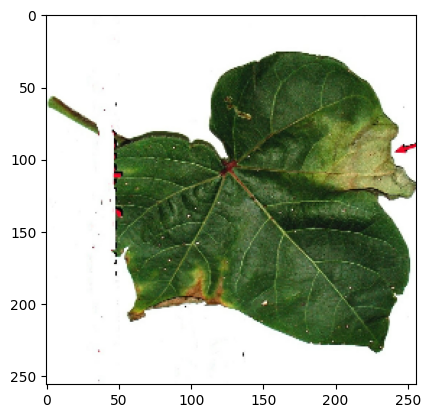

In [77]:
PATH_TO_DATA = "Cotton_Leaf_Dataset/Prediction_Images"

class_names = ["bacterial_blight", "curl_virus", "fussarium_wilt", "healthy"]

test_ds = keras.preprocessing.image_dataset_from_directory(
        "Cotton_Leaf_Dataset/cotton/test/",
        seed=1337,
        image_size=(256, 256),
        batch_size=32,
)

arr = []
i = 0


for images_batch, labels_batch in test_ds.take(1):
    #print(images_batch)
    #print(labels_batch)
    first_img = images_batch[9].numpy().astype('uint8')
    arr.append(first_img)
    first_label = labels_batch[9].numpy()
    
    print("first image to predict")
    plt.imshow(first_img)
    print("actual label:",class_names[first_label]) 
    
    batch_prediction = reconstructed_model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[9])])

In [131]:
import PIL
import PIL.Image
import tensorflow as tf

def preprocess_image(image, target_size):
    image = image.resize(target_size)
    image = tf.keras.utils.array_to_img(image)
    image = np.expand_dims(image, axis = 0)
    return image

path = "Cotton_Leaf_Dataset/Prediction_Images/demo1.jpg"
img = PIL.Image.open(path)
p_img = preprocess_image(img, target_size=(256, 256))

p_img = p_img.reshape(-1, 256, 256, 3)
res = reconstructed_model.predict(p_img)

prediction = reconstructed_model.predict(p_img).tolist()
print("predicted label:", class_names[np.argmax(prediction)])

print(prediction[0][0])
print(prediction[0][1])
print(prediction[0][2])
print(prediction[0][3])

1/1 [==============================] - 0s 50ms/step
predicted label: bacterial_blight
0.995610773563385
0.0018480857834219933
0.0025399092119187117
1.2329315950410091e-06
